In [1]:
%matplotlib inline
import matplotlib.pyplot  as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle 
import random

In [2]:
with open ("train.p",mode = 'rb') as training_data :
    train = pickle.load(training_data)
with open ("valid.p",mode = 'rb') as validation_data :
    valid = pickle.load(validation_data)
with open ("test.p",mode = 'rb') as testing_data :
    test = pickle.load(testing_data)

In [3]:
x_train , y_train = train['features'] , train['labels']
x_valid , y_valid = valid['features'] , valid['labels']
x_test , y_test = test['features'] , test['labels']

In [4]:
x_train.shape , y_train.shape

((34799, 32, 32, 3), (34799,))

In [5]:
x_test.shape , y_test.shape

((12630, 32, 32, 3), (12630,))

In [6]:
x_valid.shape , y_valid.shape

((4410, 32, 32, 3), (4410,))

4

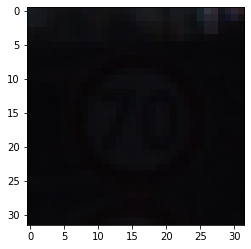

In [7]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

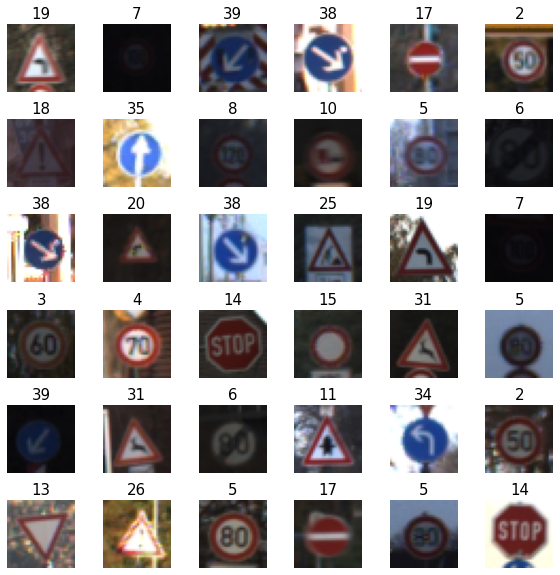

In [8]:
w_grid = 6
l_grid = 6
fig , axes = plt.subplots(l_grid , w_grid , figsize=(10,10))
axes = axes.ravel()
n_training = len(x_train)

for i in range( 0 ,w_grid*l_grid):
    index = np.random.randint(0 , n_training)
    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index] , fontsize = 15)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace= 0.4)  

In [9]:
from sklearn.utils import shuffle
x_train ,y_train = shuffle(x_train , y_train)
x_test , y_test = shuffle(x_test , y_test)
x_valid , y_valid = shuffle(x_valid , y_valid)


In [10]:
x_train_gray = np.sum(x_train/3 , axis = 3 ,keepdims = True)
x_test_gray = np.sum(x_test/3 , axis = 3 ,keepdims = True)
x_valid_gray = np.sum(x_valid/3 , axis = 3 ,keepdims = True)

In [11]:
x_train_gray.shape

(34799, 32, 32, 1)

In [12]:
x_train_gray_norm = (x_train_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128
x_valid_gray_norm = (x_valid_gray-128)/128

In [13]:
x_train_gray_norm

array([[[[-0.53645833],
         [-0.5390625 ],
         [-0.55208333],
         ...,
         [-0.73177083],
         [-0.72395833],
         [-0.7265625 ]],

        [[-0.56510417],
         [-0.5703125 ],
         [-0.58072917],
         ...,
         [-0.73958333],
         [-0.72135417],
         [-0.72135417]],

        [[-0.5625    ],
         [-0.56770833],
         [-0.57552083],
         ...,
         [-0.70052083],
         [-0.72916667],
         [-0.72135417]],

        ...,

        [[-0.60677083],
         [-0.61197917],
         [-0.60677083],
         ...,
         [-0.703125  ],
         [-0.72916667],
         [-0.7265625 ]],

        [[-0.61979167],
         [-0.63541667],
         [-0.63020833],
         ...,
         [-0.77864583],
         [-0.765625  ],
         [-0.73958333]],

        [[-0.63802083],
         [-0.67708333],
         [-0.67708333],
         ...,
         [-0.77864583],
         [-0.7578125 ],
         [-0.73697917]]],


       [[[-0.72135417],


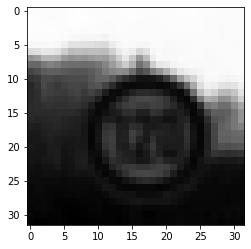

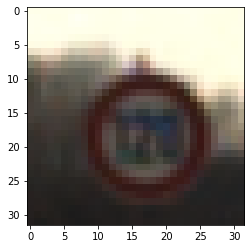

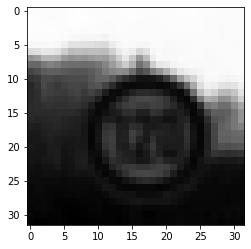

In [14]:
i = np.random.randint(1 , len(x_test_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap ='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze() , cmap = 'gray')

In [15]:
from tensorflow.keras  import datasets , layers , models

CNN = models.Sequential()
CNN.add(layers.Conv2D(6 , (5,5) , activation ='relu' , input_shape =(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16 , (5,5) , activation ='relu'))
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())

CNN.add(layers.Dense(120 , activation ='relu'))
CNN.add(layers.Dense(84 , activation ='relu'))
CNN.add(layers.Dense(43 , activation ='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [16]:
CNN.compile(optimizer= 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])


In [17]:
history  = CNN.fit(x_train_gray_norm,
                  y_train,
                  batch_size= 500 ,
                  epochs= 50 ,
                  verbose=1,
                  validation_data = (x_valid_gray_norm , y_valid))

Epoch 1/50
70/70 [==============================] - 9s 128ms/step - loss: 3.3104 - accuracy: 0.1315 - val_loss: 2.9785 - val_accuracy: 0.2306
Epoch 2/50
70/70 [==============================] - 9s 132ms/step - loss: 2.1857 - accuracy: 0.3973 - val_loss: 1.8578 - val_accuracy: 0.4980
Epoch 3/50
70/70 [==============================] - 11s 151ms/step - loss: 1.4630 - accuracy: 0.5763 - val_loss: 1.3084 - val_accuracy: 0.6059
Epoch 4/50
70/70 [==============================] - 11s 152ms/step - loss: 1.0507 - accuracy: 0.6911 - val_loss: 0.9486 - val_accuracy: 0.7293
Epoch 5/50
70/70 [==============================] - 11s 152ms/step - loss: 0.8084 - accuracy: 0.7588 - val_loss: 0.7828 - val_accuracy: 0.7812
Epoch 6/50
70/70 [==============================] - 11s 151ms/step - loss: 0.6605 - accuracy: 0.8043 - val_loss: 0.6470 - val_accuracy: 0.8073
Epoch 7/50
70/70 [==============================] - 11s 151ms/step - loss: 0.5435 - accuracy: 0.8427 - val_loss: 0.6000 - val_accuracy: 0.8209
E

In [19]:
score = CNN.evaluate(x_test_gray_norm  , y_test)
print("Test Accuracy :{} ".format(score[1]))


395/395 [==============================] - 2s 6ms/step - loss: 0.5446 - accuracy: 0.9124
Test Accuracy :0.9123515486717224 


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Traiing and Validation Loss')

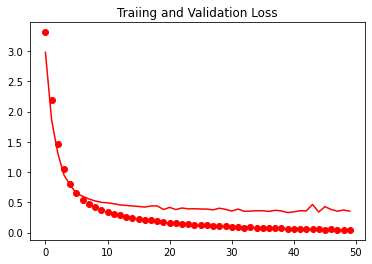

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs , loss, 'ro' , label = "Training Loss")
plt.plot(epochs , val_loss , 'r' , label = "Validation Loss")
plt.title("Traiing and Validation Loss")

Text(0.5, 1.0, 'Traiing and Validation Accuracy')

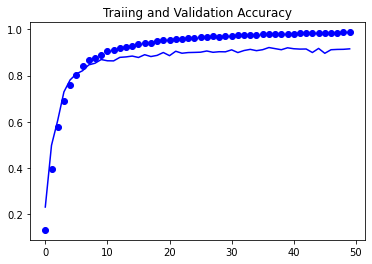

In [24]:
epochs = range(len(accuracy))
plt.plot(epochs , accuracy, 'bo' , label = "Training Accuracy")
plt.plot(epochs , val_accuracy , 'b' , label = "Validation Accuracy")
plt.title("Traiing and Validation Accuracy")

<AxesSubplot:>

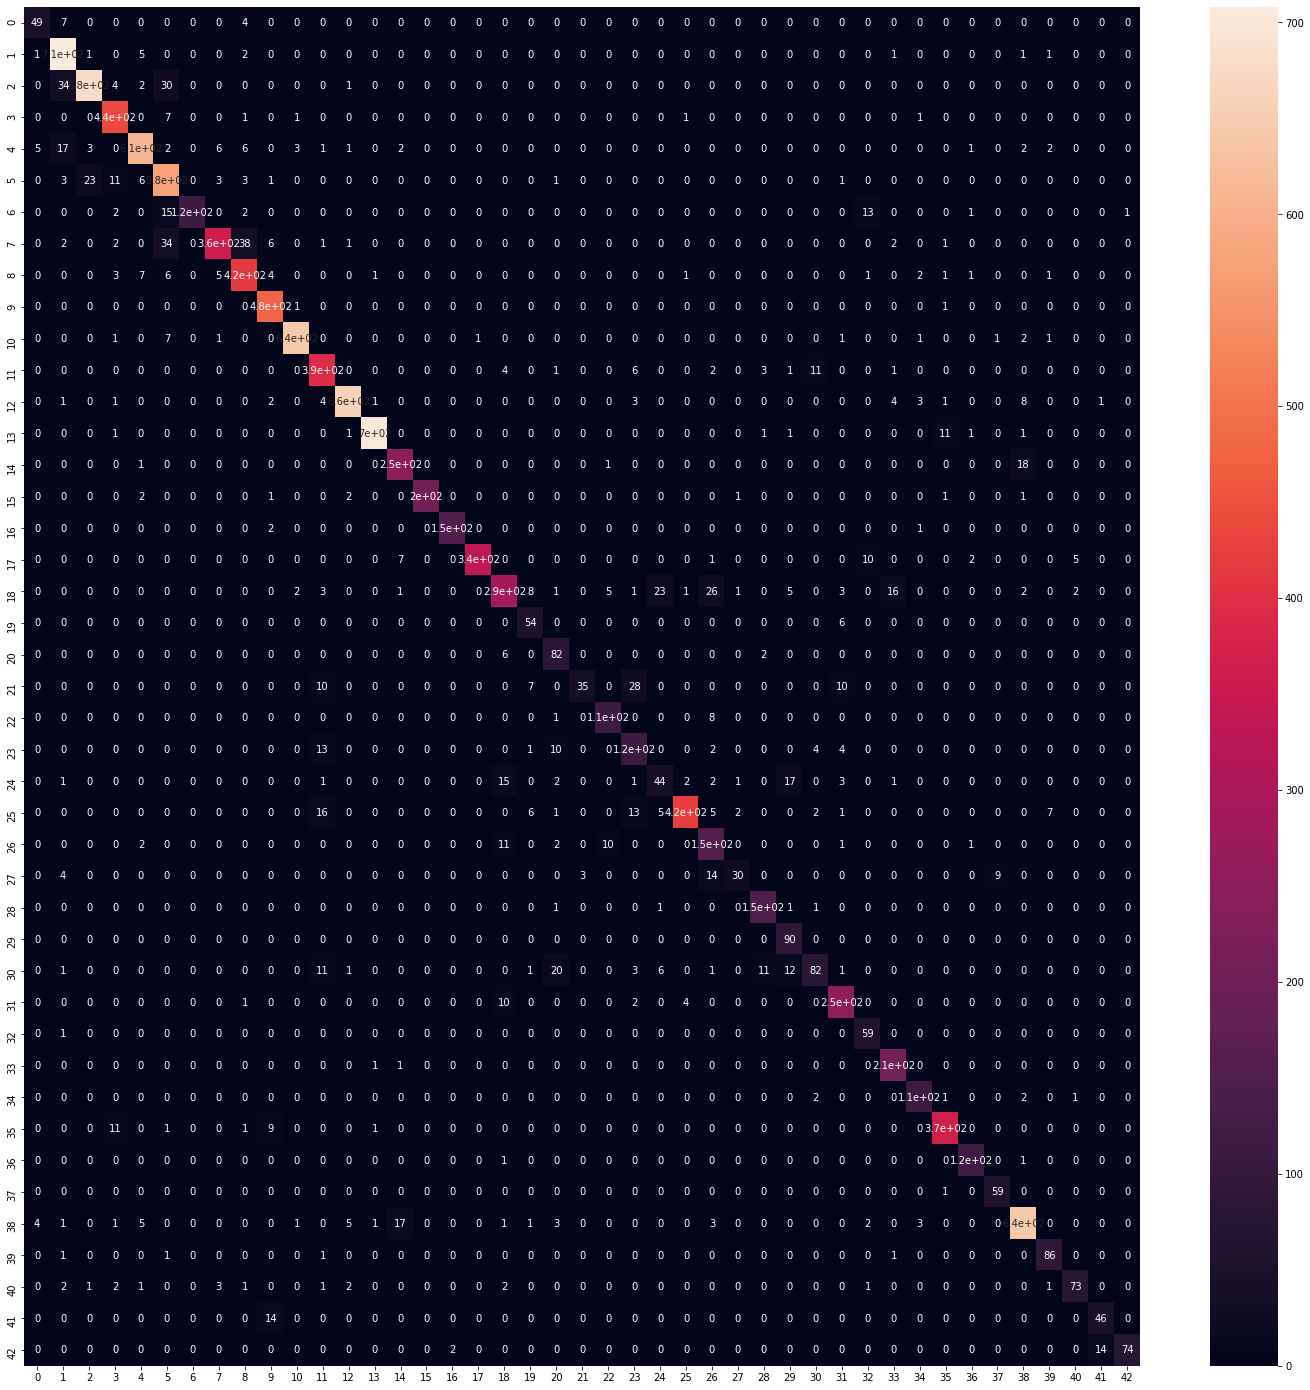

In [27]:
pred = CNN.predict_classes(x_test_gray_norm)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , pred)
plt.figure(figsize=(25,25))
sns.heatmap(cm ,annot=True , cbar =True)

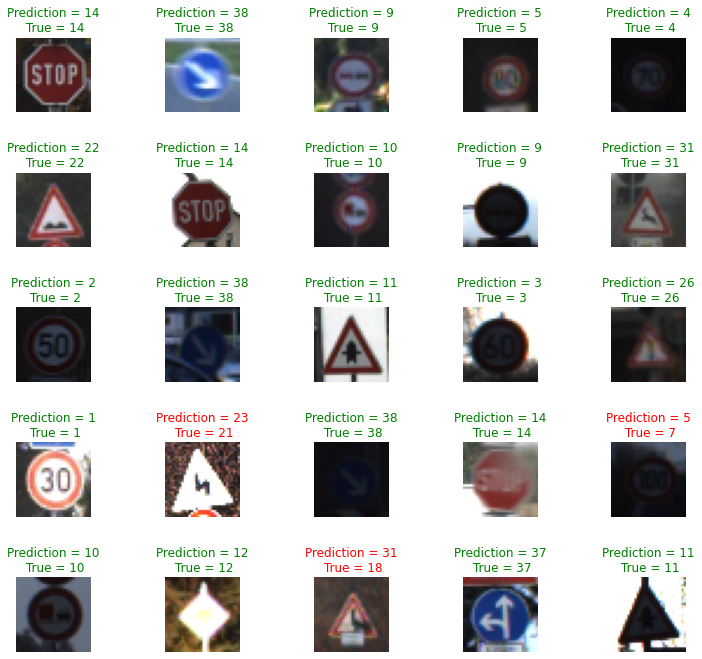

In [29]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    col = "green" if pred[i] == y_true[i] else "red"
    axes[i].set_title('Prediction = {}\n True = {}'.format(pred[i], y_true[i]) , color = col)
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  